<a href="https://colab.research.google.com/github/shakasom/MapsDataScience/blob/master/Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Location Intelligence

## Installations

The geospatial libraries are not pre installed in google colab as standard python library, therefore we need to install some libraries to use. Luckily this is an easy process. You can use either apt install or pip install. You can also create anaconda environment, but that is a bit complex so pip and apt are enough in our case to get the libraries we need. These are the libraries we need to install in this tutorial:

Gdal
Geopandas
Folium

The installation might take 1 minute.


In [0]:
%%time 
!apt update
!apt upgrade
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium 

In [0]:
import pandas as pd
import numpy as np
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt 
import folium
import os
import seaborn as sns

## Data 

The dataset for this chapter is stored in the dropbox link. It is a valuable skill to learn how to access data on the web, so we will use WGET. WGET is great utility in accessing files from the web and supports different protocols. 

In [0]:
# Get the data from dropbox link
!wget https://www.dropbox.com/s/0zytrf2ncoquxgq/Foursquare_2014_NYC.zip

In [0]:
os.listdir(os.getcwd())

['.config', 'Foursquare_2014_NYC.zip', 'sample_data']

In [0]:
# We have zipped data so let us unzip it
!unzip Foursquare_2014_NYC.zip

Archive:  Foursquare_2014_NYC.zip
  inflating: dataset_TSMC2014_NYC.txt  


In [0]:
# Reading the nyc foursquare data

# create column names as this comes without headers
col_names = ['UserID', 'VenueID', 'VenueCategoryID', 'VenueCategoryName', 'Latitude', 'Longtitude','Timezone', 'UTCtime']

# read the csv with pandas. the data comes in tab seperator. 
nyc = pd.read_csv('dataset_TSMC2014_NYC.txt',names=col_names,sep="\t",  encoding = "ISO-8859-1" )

# Look at the first 5 rows
nyc.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012


In [0]:
# shape of the data (rows, columns)
nyc.shape

(227428, 8)

## Convert to Geographic Data

In [0]:
# Save the geometry as a new feature
geometry = [Point(xy) for xy in zip(nyc['Longtitude'], nyc['Latitude'])]

# Create crs dictionary
crs = {'init': 'epsg:4326'}

In [0]:
nyc_gdf = gpd.GeoDataFrame(nyc, crs=crs, geometry=geometry)
nyc_gdf.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
0,470,49bbd6c0f964a520f4531fe3,4bf58dd8d48988d127951735,Arts & Crafts Store,40.719810,-74.002581,-240,Tue Apr 03 18:00:09 +0000 2012,POINT (-74.00258103213994 40.71981037548853)
1,979,4a43c0aef964a520c6a61fe3,4bf58dd8d48988d1df941735,Bridge,40.606800,-74.044170,-240,Tue Apr 03 18:00:25 +0000 2012,POINT (-74.04416981025437 40.60679958140643)
2,69,4c5cc7b485a1e21e00d35711,4bf58dd8d48988d103941735,Home (private),40.716162,-73.883070,-240,Tue Apr 03 18:02:24 +0000 2012,POINT (-73.88307005845945 40.71616168484322)
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (-73.982518775 40.7451638)
4,87,4cf2c5321d18a143951b5cec,4bf58dd8d48988d1cb941735,Food Truck,40.740104,-73.989658,-240,Tue Apr 03 18:03:00 +0000 2012,POINT (-73.98965835571289 40.74010382743943)


## USER Perspective 

In [0]:
user395 = nyc_gdf[nyc_gdf['UserID'] == 395]
user395.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
3,395,4bc7086715a7ef3bef9878da,4bf58dd8d48988d104941735,Medical Center,40.745164,-73.982519,-240,Tue Apr 03 18:02:41 +0000 2012,POINT (-73.982518775 40.7451638)
7820,395,4b607313f964a5209be629e3,4bf58dd8d48988d176941735,Gym / Fitness Center,40.748005,-74.008627,-240,Tue Apr 10 02:14:21 +0000 2012,POINT (-74.0086269378662 40.74800474617332)
15980,395,4a72e5fef964a52050db1fe3,4bf58dd8d48988d176941735,Gym / Fitness Center,40.746326,-74.008624,-240,Sat Apr 14 17:59:13 +0000 2012,POINT (-74.00862364051108 40.74632626799265)
17162,395,4c7447221b30a093c93fec09,4bf58dd8d48988d16d941735,Café,40.643021,-73.977502,-240,Sun Apr 15 02:09:25 +0000 2012,POINT (-73.97750188436819 40.64302075673697)
17866,395,4d716e7f1c01b60c219214c7,4bf58dd8d48988d10c951735,Cosmetics Shop,40.762617,-73.993360,-240,Sun Apr 15 16:12:55 +0000 2012,POINT (-73.99336 40.762617)


In [0]:
user395['VenueCategoryID'].nunique()

36

In [0]:
m = folium.Map (
    location = [40.71981037548853, -74.00258103213994],
    tiles='Stamen Toner',
    zoom_start = 15
)
folium.GeoJson(user395).add_to(m)
m

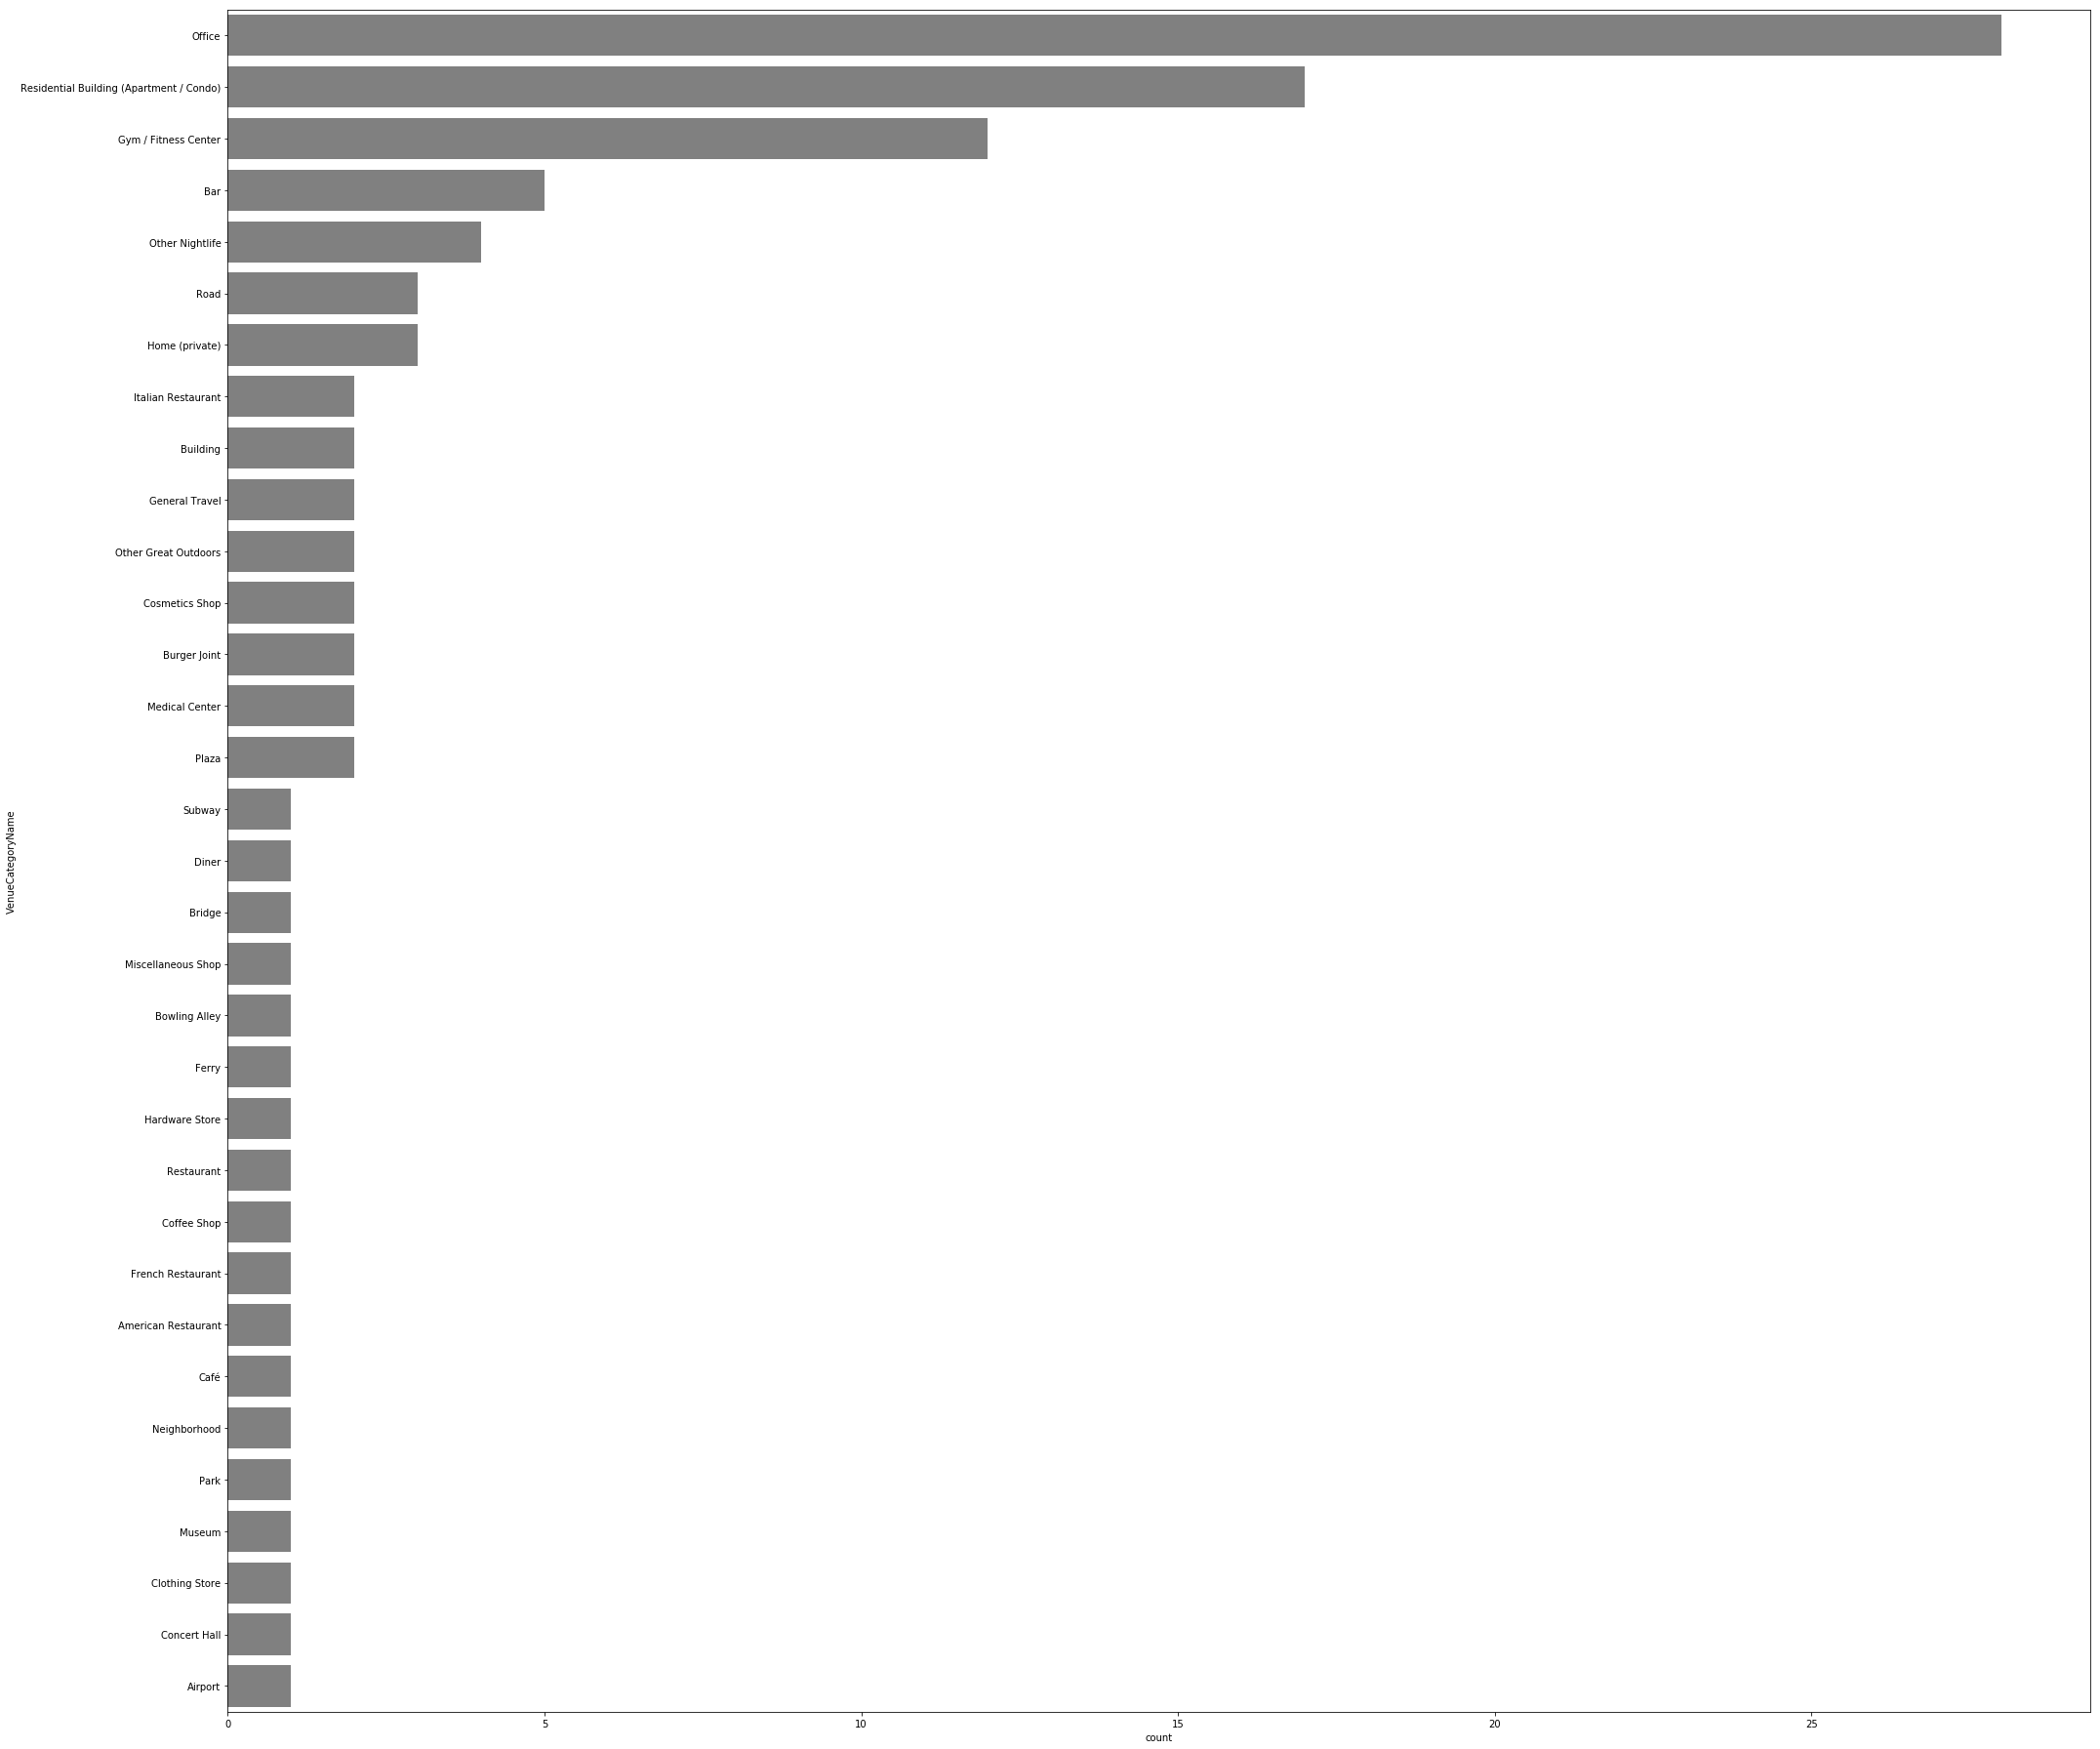

In [0]:
fig, ax = plt.subplots(figsize=(30,25))
plot = sns.countplot(y = 'VenueCategoryName', 
                     color='grey',
              order = user395['VenueCategoryName'].value_counts().index,
              data=user395, ax=ax)

plot.figure.savefig('user395.png')

plot
plt.tight_layout()
plt.show()

## Business Perspective

In [0]:
venueID = '4aca718ff964a520f6c120e3' 
gym = nyc_gdf[nyc['VenueID'] == venueID]
gym.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry
6578,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,Mon Apr 09 14:51:20 +0000 2012,POINT (-73.95777486481806 40.76695833299644)
9661,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,Wed Apr 11 13:39:29 +0000 2012,POINT (-73.95777486481806 40.76695833299644)
13575,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,Fri Apr 13 13:48:19 +0000 2012,POINT (-73.95777486481806 40.76695833299644)
16111,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766920,-73.957517,-240,Sat Apr 14 18:47:47 +0000 2012,POINT (-73.95751656924342 40.76691997413079)
19320,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766920,-73.957517,-240,Mon Apr 16 15:30:40 +0000 2012,POINT (-73.95751656924342 40.76691997413079)


In [0]:
gym.shape

(118, 9)

In [0]:
# Create a datatime column from UTCtime
gym['UTCtime'] = pd.to_datetime(gym['UTCtime'])

In [0]:
gym['hours'] = gym['UTCtime'].dt.hour

In [0]:
gym.head()

,UserID,VenueID,VenueCategoryID,VenueCategoryName,Latitude,Longtitude,Timezone,UTCtime,geometry,hours
6578,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,2012-04-09 14:51:20,POINT (-73.95777486481806 40.76695833299644),14
9661,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,2012-04-11 13:39:29,POINT (-73.95777486481806 40.76695833299644),13
13575,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766958,-73.957775,-240,2012-04-13 13:48:19,POINT (-73.95777486481806 40.76695833299644),13
16111,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766920,-73.957517,-240,2012-04-14 18:47:47,POINT (-73.95751656924342 40.76691997413079),18
19320,138,4aca718ff964a520f6c120e3,4bf58dd8d48988d175941735,Gym / Fitness Center,40.766920,-73.957517,-240,2012-04-16 15:30:40,POINT (-73.95751656924342 40.76691997413079),15


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


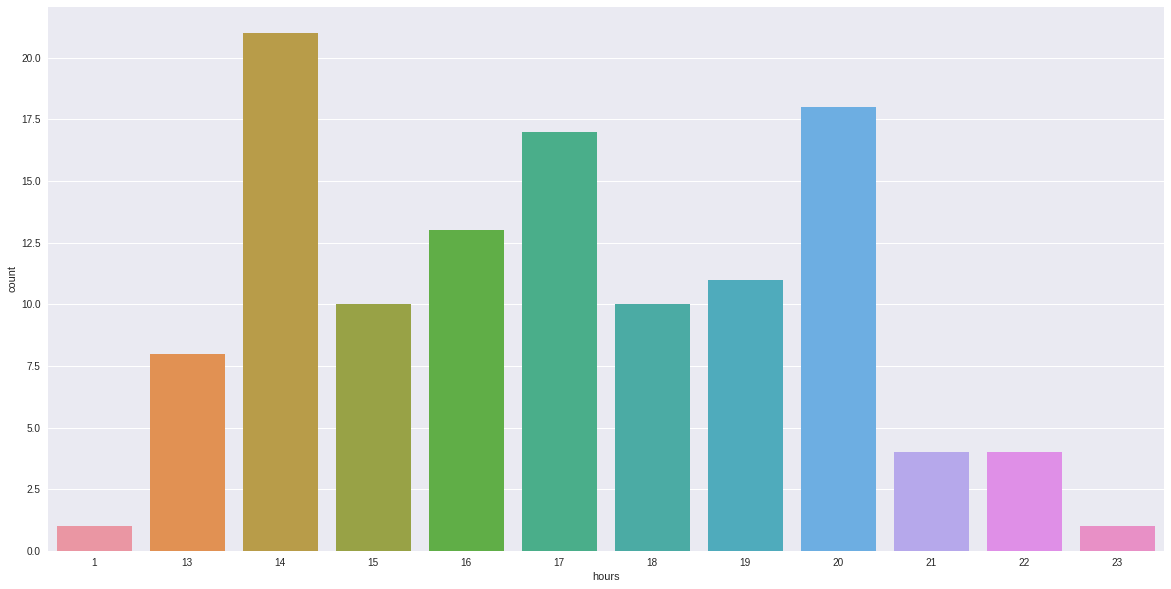

In [0]:
fig, ax = plt.subplots(figsize=(20,10))
plot = sns.countplot(x = 'hours', 
              #order = gym['hours'].value_counts().index,
              data=gym, ax=ax)
plot.figure.savefig('gym_time.png')

plot;

# END